<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/NGC6822_SFH_Wyder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

fatal: destination path 'NGC_6822' already exists and is not an empty directory.


In [6]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
import math
import scipy.integrate as integrate
pd.options.mode.chained_assignment = None  # default='warn'

from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

In [3]:
def Ellipse(x,a,b):
  '''
   a: semi-major axis
   b: semi-minor axis
  '''
  y = b * ((1 - ((x/a)**2) )**0.5)
  return y

In [4]:
Z = 0.001
Z_name = ''.join(list(str(Z))[2:])

# Data Preparing

In [7]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.07  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

Ra_center = 296.23 #degree
Dec_center = -14.80167 #degree

Distance = 500 #Kpc
R_bulge = 0.560 #Kpc
R_body = 1.4 #Kpc

In [55]:
df = pd.read_csv('/content/NGC_6822/Data/final_data_v2.csv')

In [56]:
df_wyder_region = pd.read_csv("/content/NGC_6822/Data/Wyder_regions.csv")

In [57]:
Wyder_centers = df_wyder_region.groupby('Region')['Dec','RA'].aggregate('mean')

<ipython-input-57-86897443ceb5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Wyder_centers = df_wyder_region.groupby('Region')['Dec','RA'].aggregate('mean')


In [58]:
distance_degree = 0.030
for j in range(len(Wyder_centers)):
  df['Wyder_'+ Wyder_centers.index[j]] = np.nan
  for i in range(len(df)):
    distance = (((df.loc[i,'Dec(J2000) deg']-Wyder_centers.loc[Wyder_centers.index[j],'Dec'])**2) +
                ((df.loc[i,'Ra(J2000) deg']-Wyder_centers.loc[Wyder_centers.index[j],'RA'])**2))**0.5
    if distance <= distance_degree :
      df.loc[i,'Wyder_'+ Wyder_centers.index[j]] = distance

In [59]:
df

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,eKs,Types,DCG,Wyder_C1,Wyder_C12,Wyder_C18,Wyder_C25,Wyder_H IV,Wyder_HV I,Wyder_HV II,Wyder_HV III
0,10870.0,296.178920,-14.822860,17.520,0.04,16.53,0.04,16.19,0.05,S,0.055301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10784.0,296.215450,-14.834690,17.450,0.03,16.53,0.04,16.20,0.06,S,0.036084,NaN,NaN,NaN,NaN,NaN,0.017071,0.026092,NaN
2,11004.0,296.273410,-14.808610,17.600,0.03,16.62,0.03,16.27,0.05,S,0.043961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11029.0,296.283080,-14.804970,17.460,0.03,16.55,0.02,16.22,0.05,S,0.053182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12050.0,296.254270,-14.817640,18.170,0.07,17.25,0.10,16.70,0.05,S,0.029053,NaN,NaN,NaN,NaN,NaN,NaN,0.021267,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,NaN,296.003693,-14.974893,18.392,NaN,17.56,NaN,17.21,NaN,C,0.284993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,10032.0,296.226960,-14.801910,14.480,NaN,13.66,NaN,13.34,NaN,s,0.003049,NaN,NaN,NaN,NaN,NaN,0.018258,0.014904,NaN
374,10074.0,296.240050,-14.807960,14.740,NaN,13.94,NaN,13.66,NaN,s,0.011856,NaN,NaN,NaN,NaN,NaN,0.019999,0.010235,NaN
375,20022.0,296.208160,-14.726160,14.090,NaN,13.21,NaN,12.83,NaN,s,0.078605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_LPV = pd.read_csv('/content/NGC_6822/Data_Correction_v2/NGC6822_LPV_Data_'+Z_name+'.csv')

In [61]:
df = df_LPV.merge(df, how='inner', on = ['Ra(J2000) deg','Dec(J2000) deg'])

Sorting By t (Age of LPV Stras)

In [62]:
df = df.sort_values(by='t', ascending=False)
df = df.reset_index()

In [63]:
df

,index,Id-main_x,Ra(J2000) deg,Dec(J2000) deg,J_x,Ks_x,Types_x,DCG_x,J-Ks,Log(M/Ms),...,Types_y,DCG_y,Wyder_C1,Wyder_C12,Wyder_C18,Wyder_C25,Wyder_H IV,Wyder_HV I,Wyder_HV II,Wyder_HV III
0,148,89.99,296.204498,-14.674287,18.120,17.210,C,0.129911,0.910,-0.032040,...,C,0.129911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,186,89.99,296.333038,-14.770712,18.040,17.180,C,0.107588,0.860,-0.025920,...,C,0.107588,NaN,NaN,NaN,0.012753,NaN,NaN,NaN,NaN
2,372,89.99,296.003693,-14.974893,18.192,17.140,C,0.284993,1.052,-0.017760,...,C,0.284993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,265,89.99,296.199615,-14.780900,18.214,17.131,C,0.036805,1.083,-0.015924,...,C,0.036805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,352,89.99,296.281311,-14.863727,18.271,17.109,C,0.080523,1.162,-0.011436,...,C,0.080523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,374,10074.00,296.240050,-14.807960,14.540,13.590,s,0.011856,0.950,0.955360,...,s,0.011856,NaN,NaN,NaN,NaN,NaN,0.019999,0.010235,NaN
373,373,10032.00,296.226960,-14.801910,14.280,13.270,s,0.003049,1.010,1.075680,...,s,0.003049,NaN,NaN,NaN,NaN,NaN,0.018258,0.014904,NaN
374,376,40397.00,296.243010,-14.746520,13.900,12.920,s,0.056664,0.980,1.180000,...,s,0.056664,NaN,0.020533,NaN,NaN,NaN,NaN,NaN,0.02604
375,375,20022.00,296.208160,-14.726160,13.890,12.760,s,0.078605,1.130,1.225430,...,s,0.078605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df['alpha'] = np.nan
for i in df.index:
  if df.loc[i,'M/Ms'] < 0.08 :
     df.loc[i,'alpha'] = 0.3
  elif df.loc[i,'M/Ms'] >= 0.5 :
     df.loc[i,'alpha'] = 2.3
  else :
     df.loc[i,'alpha'] = 1.3  

(array([  0.,   0.,   0.,   0.,   0., 377.,   0.,   0.,   0.,   0.]),
 array([1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8]),
 <BarContainer object of 10 artists>)

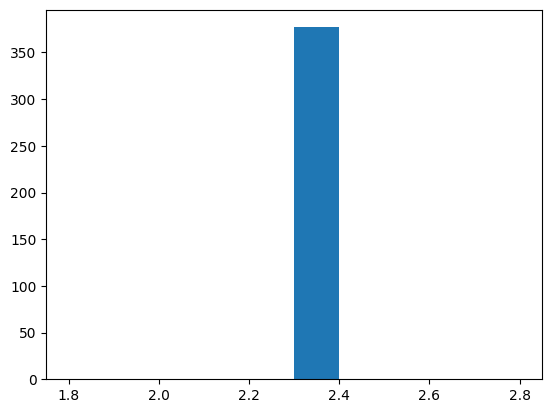

In [65]:
plt.hist(df['alpha'])

# Wyder

In [66]:
df

,index,Id-main_x,Ra(J2000) deg,Dec(J2000) deg,J_x,Ks_x,Types_x,DCG_x,J-Ks,Log(M/Ms),...,DCG_y,Wyder_C1,Wyder_C12,Wyder_C18,Wyder_C25,Wyder_H IV,Wyder_HV I,Wyder_HV II,Wyder_HV III,alpha
0,148,89.99,296.204498,-14.674287,18.120,17.210,C,0.129911,0.910,-0.032040,...,0.129911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3
1,186,89.99,296.333038,-14.770712,18.040,17.180,C,0.107588,0.860,-0.025920,...,0.107588,NaN,NaN,NaN,0.012753,NaN,NaN,NaN,NaN,2.3
2,372,89.99,296.003693,-14.974893,18.192,17.140,C,0.284993,1.052,-0.017760,...,0.284993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3
3,265,89.99,296.199615,-14.780900,18.214,17.131,C,0.036805,1.083,-0.015924,...,0.036805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3
4,352,89.99,296.281311,-14.863727,18.271,17.109,C,0.080523,1.162,-0.011436,...,0.080523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,374,10074.00,296.240050,-14.807960,14.540,13.590,s,0.011856,0.950,0.955360,...,0.011856,NaN,NaN,NaN,NaN,NaN,0.019999,0.010235,NaN,2.3
373,373,10032.00,296.226960,-14.801910,14.280,13.270,s,0.003049,1.010,1.075680,...,0.003049,NaN,NaN,NaN,NaN,NaN,0.018258,0.014904,NaN,2.3
374,376,40397.00,296.243010,-14.746520,13.900,12.920,s,0.056664,0.980,1.180000,...,0.056664,NaN,0.020533,NaN,NaN,NaN,NaN,NaN,0.02604,2.3
375,375,20022.00,296.208160,-14.726160,13.890,12.760,s,0.078605,1.130,1.225430,...,0.078605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3


In [94]:
col_list = df.columns[-9:-1]
print(col_list)

Index(['Wyder_C1', 'Wyder_C12', 'Wyder_C18', 'Wyder_C25', 'Wyder_H IV',
       'Wyder_HV I', 'Wyder_HV II', 'Wyder_HV III'],
      dtype='object')


## R < 0.023

In [125]:
radius_degree = 0.023
Region_Area = math.radians(radius_degree) * Distance
loc_pop = []
for i in col_list :
  loc_pop.append(sum(df[i]<radius_degree))

print(loc_pop)

[3, 14, 11, 6, 11, 15, 15, 7]


In [126]:
# In this cell, you should set the number of stars in each bin manually if you change the radius of regions.
bins_pop_loc = [[],[4,4,3,3],[3,3,3,2],[],[3,3,3,2],[4,4,4,3],[4,4,3,3],[]]
len(bins_pop_loc)

8

<ipython-input-127-504d8a30f65c>:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
<ipython-input-127-504d8a30f65c>:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
<ipython-input-127-504d8a30f65c>:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
<ipython-input-127-504d8a30f65c>:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
<ipython-input-127-504d8a30f65c>:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")


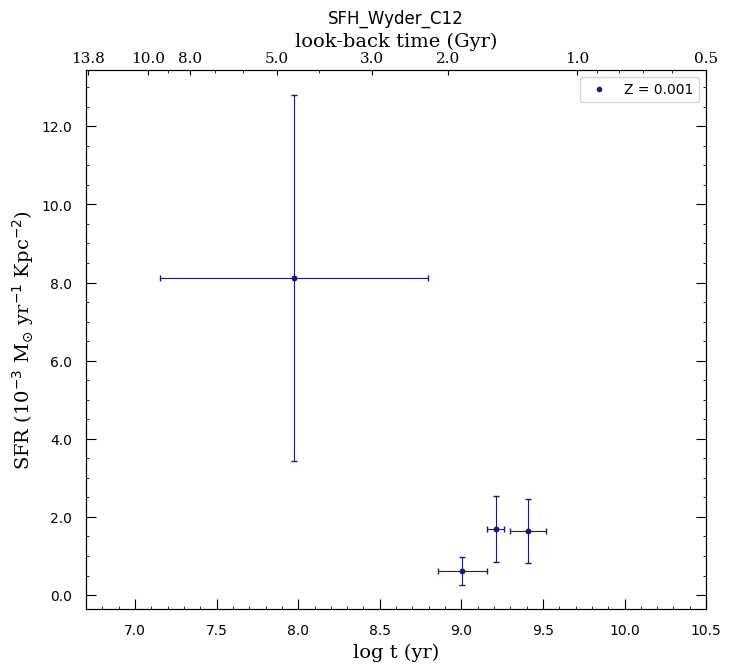

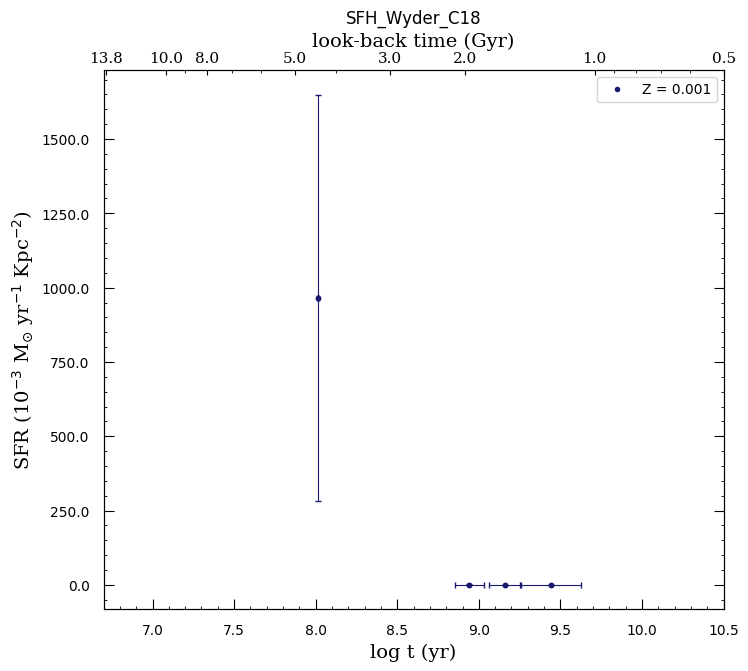

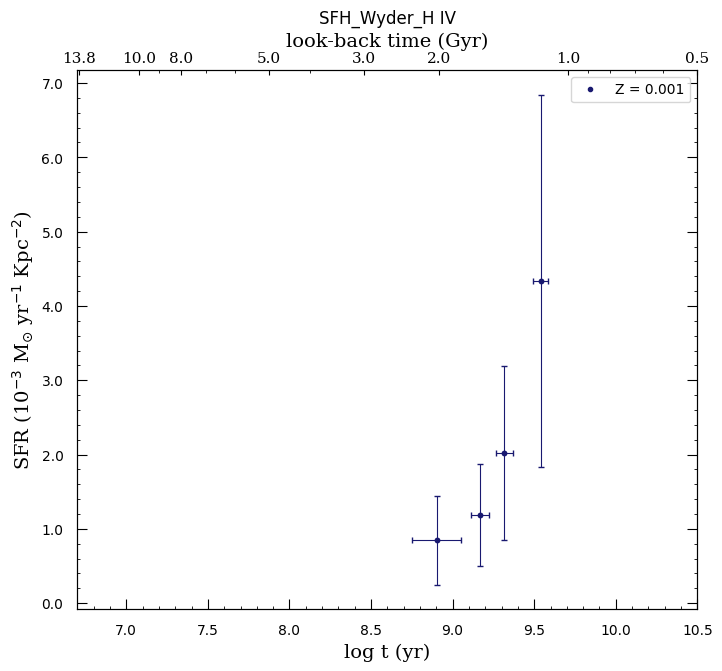

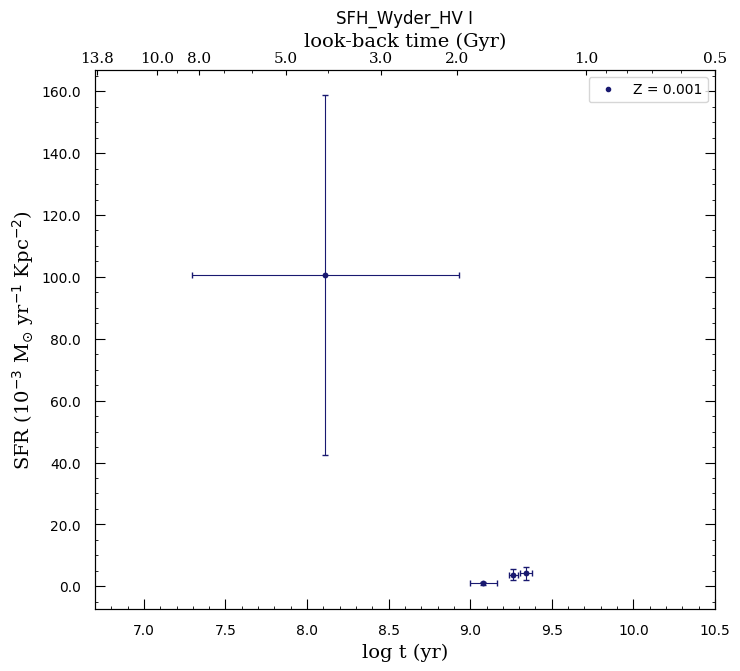

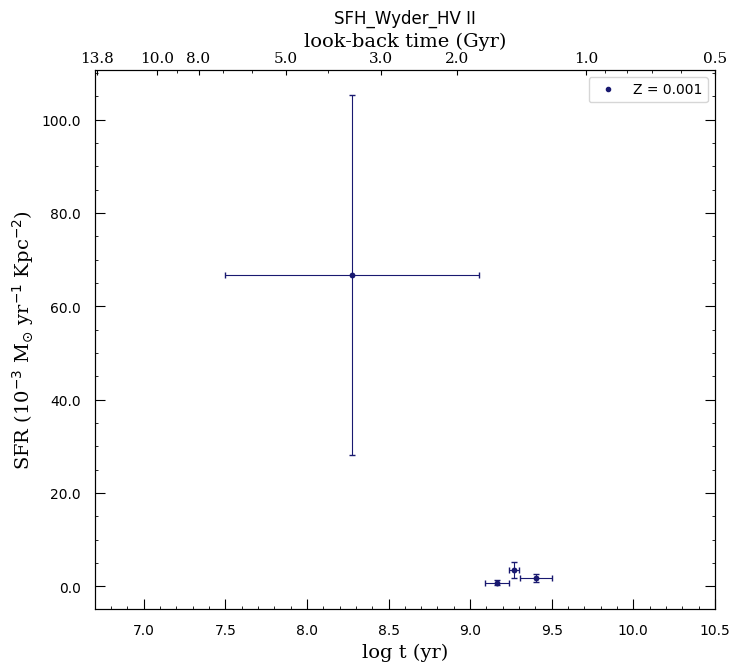

In [127]:
for i in range(len(col_list)):
  region_name = col_list[i]
  if len(bins_pop_loc[i]) > 0 :

    df_Wyder = df[df[col_list[i]] < radius_degree ]
    bins_pop = bins_pop_loc[i]

    lower_index = 0
    sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                      + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                        + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

    log_t = []
    log_t_err = []

    XI = []
    XI_err = []

    alpha =[]
    M_lower_limit = []
    M_upper_limit = []
    log_t_lower_limit = []
    log_t_upper_limit = []

    for i in bins_pop :

      selected_df = df_Wyder[lower_index:lower_index+i]

      # Calculating limitation of each bin 
      M_lower_limit_ = selected_df.iloc[0]['M/Ms']
      M_upper_limit_ = selected_df.iloc[-1]['M/Ms']
      alpha_ = selected_df.iloc[0]['alpha']
      log_t_lower_limit_ = selected_df.iloc[-1]['Log(t)']
      log_t_upper_limit_ = selected_df.iloc[0]['Log(t)']

      # Adding to lists
      alpha.append(alpha_)
      M_lower_limit.append(M_lower_limit_)
      M_upper_limit.append(M_upper_limit_)
      log_t_lower_limit.append(log_t_lower_limit_)
      log_t_upper_limit.append(log_t_upper_limit_)

      # Calculating XI
      p1 = sum(1/selected_df['dt'])
      p2 = sub_integration
      p3 , err = integrate.quad(lambda m: m**(-alpha_) , M_lower_limit_, M_upper_limit_)
      
      XI_ = p1 * p2 * (1/p3) / Region_Area * 1000
      XI_err_ = XI_ * ((i**0.5)/i) 

      log_t.append((log_t_lower_limit_ + log_t_upper_limit_)/2)
      log_t_err.append((log_t_upper_limit_ - log_t_lower_limit_ )/2)
      XI.append(XI_)
      XI_err.append(XI_err_)

      lower_index += i

    columns = ['log(t) (lower limit)' , 'log(t) (upper limit)',
              'M (lower limit)', 'M (upper limit)' , 'Alpha' , 'Mean log(t)',
              'Mean log(t) error' , 'XI' , 'XI error'] 
    # Calling DataFrame constructor after zipping
    # both lists, with columns specified
    SFH_df = pd.DataFrame(list(zip(log_t_lower_limit, log_t_upper_limit,
                                  M_lower_limit,M_upper_limit,alpha,log_t,
                                  log_t_err,XI,XI_err)), columns =columns)
    
    plt.figure(figsize = (8,7), dpi = 100)

    plt.title('SFH_'+region_name)
    plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
    plt.ylabel('SFR (10$^{-3}$ M$_{\odot}$ yr$^{-1}$ kpc$^{-2}$)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

    plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
    plt.tick_params(axis='y', which='both', left=True, direction='in')
    plt.tick_params(axis='x', which='both', bottom=True, direction='in')
    plt.tick_params(axis='x', which='both', top=True, direction='in')
    plt.tick_params(axis='y', which='both', right=True, direction='in')

    plt.minorticks_on()

    #plt.xlim(10.5,6.7)
    plt.xlim(6.7,10.5)

    plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = 'midnightblue', label = 'Z = ' + str(Z))
    plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
                SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color='midnightblue', capsize=2.5, linewidth=0.8)
    

    plt.legend()

    ###########################################
    ax2 = plt.twiny()

    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()
    ax2.set_xlim(13.96,0.575)

    ax2.set_xscale('log')

    ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
    ax2.xaxis.set_label_position('top') 
    ax2.yaxis.set_label_position('right') 
    ax2.set_xticks((13.8,10,8,5,3,2,1,0.5))
    ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
    ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
    ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

    ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
    ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
    ###########################################


    # plt.title('Field 1 - Without Using Probability Function', fontsize = 13)
    plt.savefig('SFR_'+ region_name +Z_name+'.jpeg', bbox_inches='tight', dpi = 400)

## R < 0.023

In [117]:
radius_degree = 0.03
Region_Area = math.radians(radius_degree) * Distance
loc_pop = []
for i in col_list :
  loc_pop.append(sum(df[i]<radius_degree))

print(loc_pop)

[5, 21, 20, 8, 19, 23, 28, 11]


In [118]:
# In this cell, you should set the number of stars in each bin manually if you change the radius of regions.
bins_pop_loc = [[],[4,4,4,3,3,3],[4,4,3,3,3,3],[2,2,2,2],[4,3,3,3,3,3],[4,4,4,4,4,3],[4,4,4,4,4,4,4],[3,2,2,2,2]]
len(bins_pop_loc)

8

<ipython-input-124-504d8a30f65c>:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
<ipython-input-124-504d8a30f65c>:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
<ipython-input-124-504d8a30f65c>:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
<ipython-input-124-504d8a30f65c>:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
<ipython-input-124-504d8a30f65c>:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
<ipython-input-124-504d8a30f65c>:105: UserWarning: FixedFormatter should on

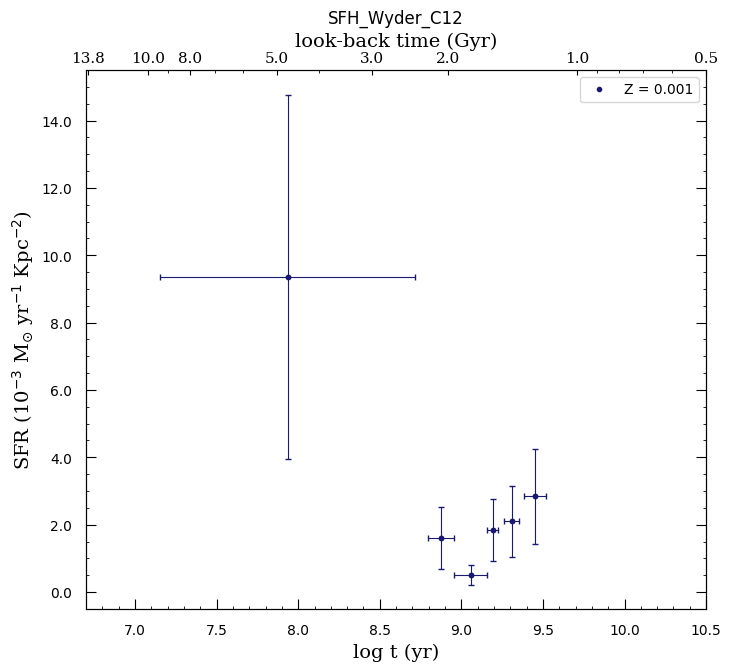

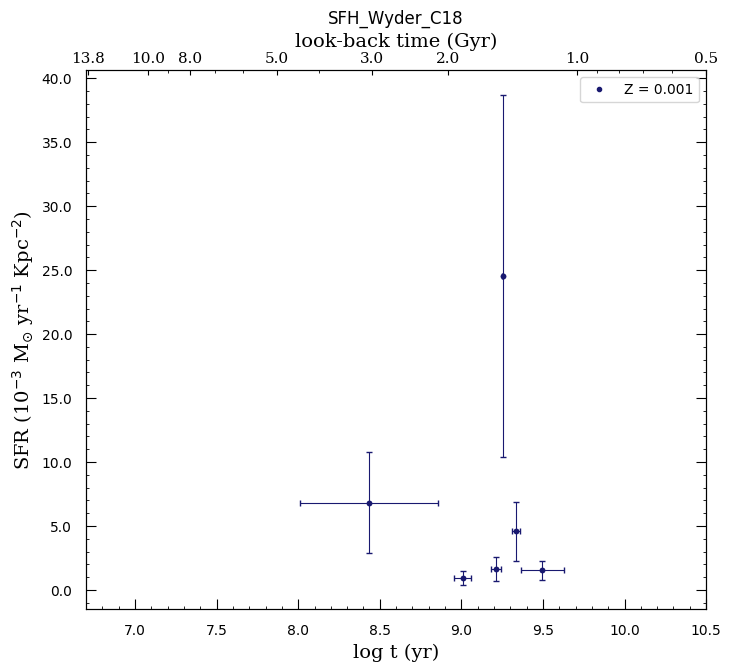

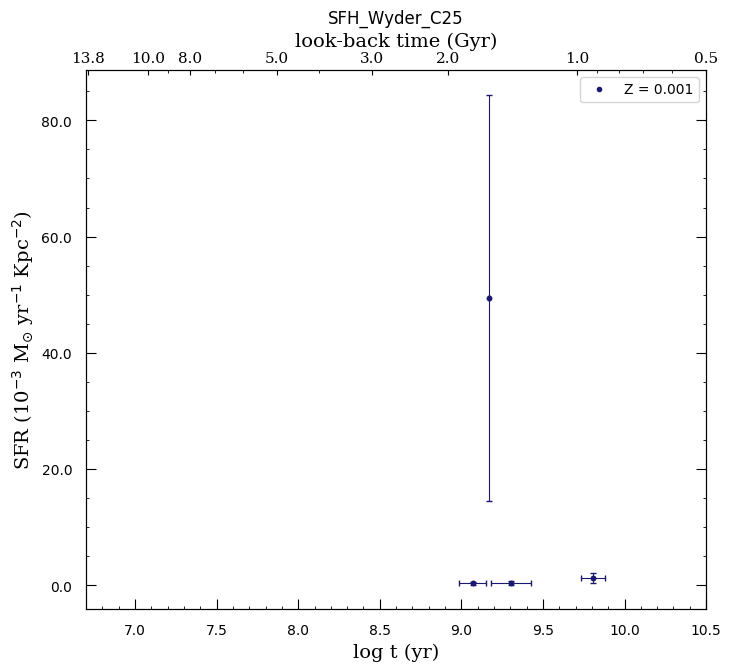

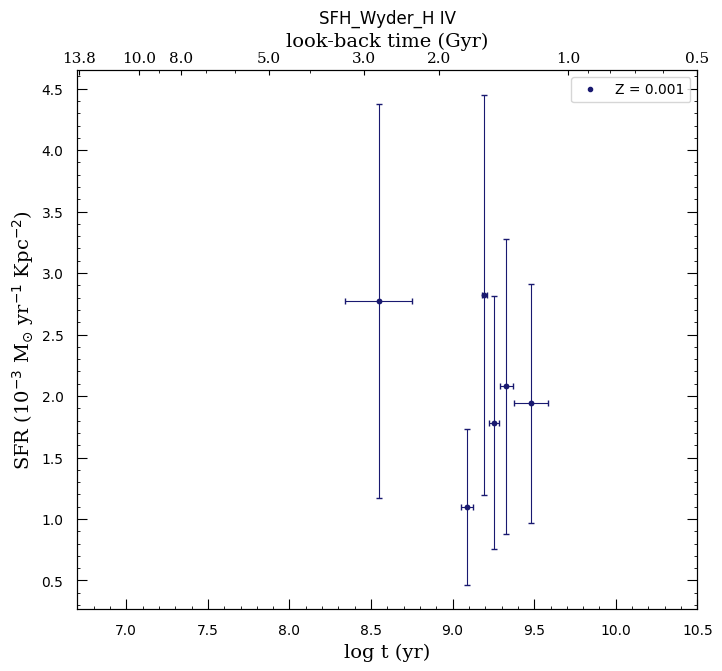

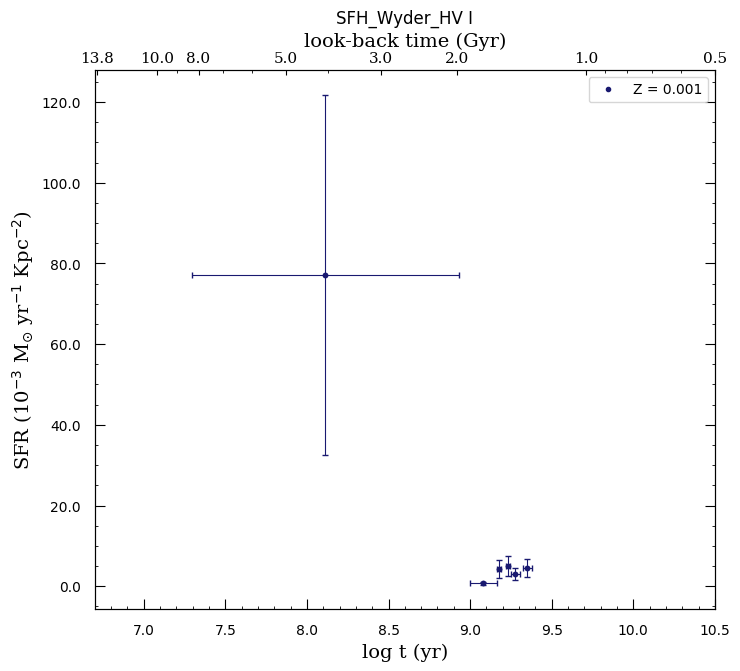

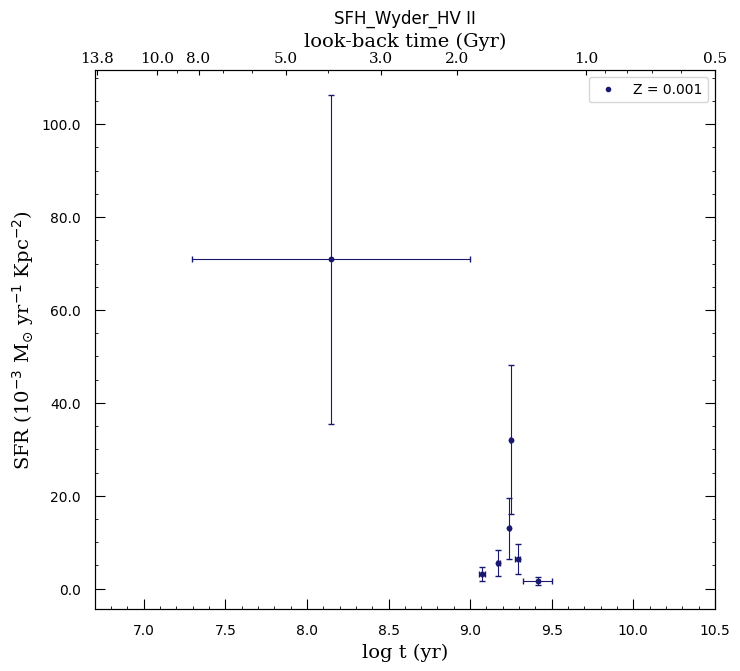

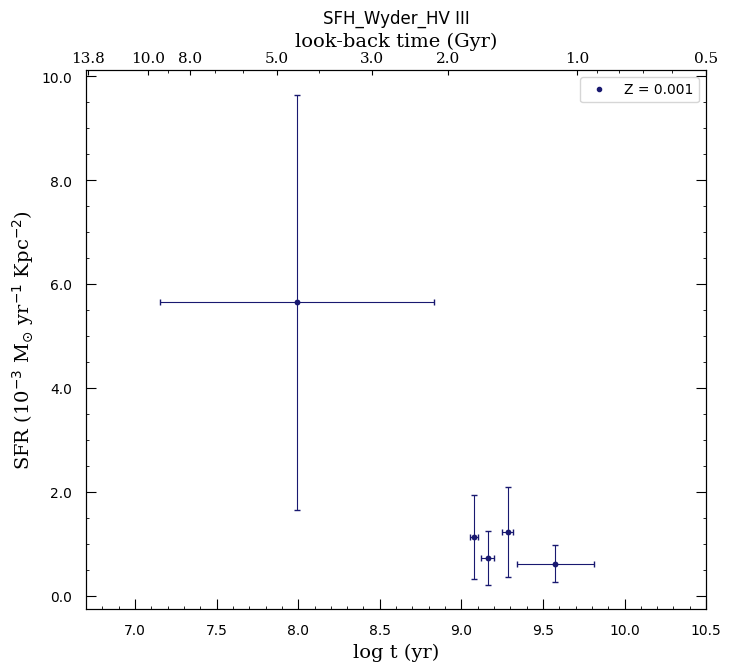

In [124]:
for i in range(len(col_list)):
  region_name = col_list[i]
  if len(bins_pop_loc[i]) > 0 :

    df_Wyder = df[df[col_list[i]] < radius_degree ]
    bins_pop = bins_pop_loc[i]

    lower_index = 0
    sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                      + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                        + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

    log_t = []
    log_t_err = []

    XI = []
    XI_err = []

    alpha =[]
    M_lower_limit = []
    M_upper_limit = []
    log_t_lower_limit = []
    log_t_upper_limit = []

    for i in bins_pop :

      selected_df = df_Wyder[lower_index:lower_index+i]

      # Calculating limitation of each bin 
      M_lower_limit_ = selected_df.iloc[0]['M/Ms']
      M_upper_limit_ = selected_df.iloc[-1]['M/Ms']
      alpha_ = selected_df.iloc[0]['alpha']
      log_t_lower_limit_ = selected_df.iloc[-1]['Log(t)']
      log_t_upper_limit_ = selected_df.iloc[0]['Log(t)']

      # Adding to lists
      alpha.append(alpha_)
      M_lower_limit.append(M_lower_limit_)
      M_upper_limit.append(M_upper_limit_)
      log_t_lower_limit.append(log_t_lower_limit_)
      log_t_upper_limit.append(log_t_upper_limit_)

      # Calculating XI
      p1 = sum(1/selected_df['dt'])
      p2 = sub_integration
      p3 , err = integrate.quad(lambda m: m**(-alpha_) , M_lower_limit_, M_upper_limit_)
      
      XI_ = p1 * p2 * (1/p3) / Region_Area * 1000
      XI_err_ = XI_ * ((i**0.5)/i) 

      log_t.append((log_t_lower_limit_ + log_t_upper_limit_)/2)
      log_t_err.append((log_t_upper_limit_ - log_t_lower_limit_ )/2)
      XI.append(XI_)
      XI_err.append(XI_err_)

      lower_index += i

    columns = ['log(t) (lower limit)' , 'log(t) (upper limit)',
              'M (lower limit)', 'M (upper limit)' , 'Alpha' , 'Mean log(t)',
              'Mean log(t) error' , 'XI' , 'XI error'] 
    # Calling DataFrame constructor after zipping
    # both lists, with columns specified
    SFH_df = pd.DataFrame(list(zip(log_t_lower_limit, log_t_upper_limit,
                                  M_lower_limit,M_upper_limit,alpha,log_t,
                                  log_t_err,XI,XI_err)), columns =columns)
    
    plt.figure(figsize = (8,7), dpi = 100)

    plt.title('SFH_'+region_name)
    plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
    plt.ylabel('SFR (10$^{-3}$ M$_{\odot}$ yr$^{-1}$ kpc$^{-2}$)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

    plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
    plt.tick_params(axis='y', which='both', left=True, direction='in')
    plt.tick_params(axis='x', which='both', bottom=True, direction='in')
    plt.tick_params(axis='x', which='both', top=True, direction='in')
    plt.tick_params(axis='y', which='both', right=True, direction='in')

    plt.minorticks_on()

    #plt.xlim(10.5,6.7)
    plt.xlim(6.7,10.5)

    plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = 'midnightblue', label = 'Z = ' + str(Z))
    plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
                SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color='midnightblue', capsize=2.5, linewidth=0.8)
    

    plt.legend()

    ###########################################
    ax2 = plt.twiny()

    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()
    ax2.set_xlim(13.96,0.575)

    ax2.set_xscale('log')

    ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
    ax2.xaxis.set_label_position('top') 
    ax2.yaxis.set_label_position('right') 
    ax2.set_xticks((13.8,10,8,5,3,2,1,0.5))
    ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
    ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
    ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

    ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
    ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
    ###########################################


    # plt.title('Field 1 - Without Using Probability Function', fontsize = 13)
    plt.savefig('SFR_'+ region_name +Z_name+'.jpeg', bbox_inches='tight', dpi = 400)